# DATASET DE COMPETIÇÃO

## Import Libraries

In [3198]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Data Understanding

### Collect initial data

In [3199]:
energia2021 = pd.read_csv("Train/energia_202109-202112.csv")
energia2022 = pd.read_csv("Train/energia_202201-202212.csv")
met2021 = pd.read_csv("Train/meteo_202109-202112.csv")
met2022 = pd.read_csv("Train/meteo_202201-202212.csv")

energia2023 = pd.read_csv("Test/energia_202301-202304.csv")
met2023 = pd.read_csv("Test/meteo_202301-202304.csv")

#### Train

In [3200]:
energia2021.info()
energia2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [3201]:
met2021.info()
met2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [3202]:
energia2022.info()
energia2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horario Economico (kWh)  8760 non-null   float64
 4   Autoconsumo (kWh)        8760 non-null   float64
 5   Injecao na rede (kWh)    2673 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 410.8+ KB


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [3203]:
met2022.info()
met2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


### Test

In [3204]:
energia2023.info()
energia2023.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 88.3+ KB


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,2023-01-01,0,0.0,0.467,0.0
1,2023-01-01,1,0.0,0.577,0.0
2,2023-01-01,2,0.0,0.346,0.0
3,2023-01-01,3,0.0,0.270,0.0
4,2023-01-01,4,0.0,0.252,0.0


In [3205]:
met2023.info()
met2023.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2256 non-null   int64  
 1   dt_iso               2256 non-null   object 
 2   city_name            2256 non-null   object 
 3   temp                 2256 non-null   float64
 4   feels_like           2256 non-null   float64
 5   temp_min             2256 non-null   float64
 6   temp_max             2256 non-null   float64
 7   pressure             2256 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2256 non-null   int64  
 11  wind_speed           2256 non-null   float64
 12  rain_1h              306 non-null    float64
 13  clouds_all           2256 non-null   int64  
 14  weather_description  2256 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain


## Data Preparation

### Handling dates

### Meteorologia 2021

In [3206]:
print(met2021['dt_iso'].head())

met2021['dt_iso'] = pd.to_datetime(met2021['dt_iso'], format = '%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce')

met2021['dt_iso'].head()

0    2021-09-01 00:00:00 +0000 UTC
1    2021-09-01 01:00:00 +0000 UTC
2    2021-09-01 02:00:00 +0000 UTC
3    2021-09-01 03:00:00 +0000 UTC
4    2021-09-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object


0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [3207]:
met2021['Data'] = met2021['dt_iso'].dt.date
print(met2021['Data'].head())

met2021['Hora'] = met2021['dt_iso'].dt.hour
print(met2021['Hora'].head())

met2021 = met2021.drop(columns=['dt_iso'])

0    2021-09-01
1    2021-09-01
2    2021-09-01
3    2021-09-01
4    2021-09-01
Name: Data, dtype: object
0    0
1    1
2    2
3    3
4    4
Name: Hora, dtype: int32


### Meteorologia 2022

In [3208]:
print(met2022['dt_iso'].head())

met2022['dt_iso'] = pd.to_datetime(met2022['dt_iso'], format = '%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce')

met2022['dt_iso'].head()

0    2022-01-01 00:00:00 +0000 UTC
1    2022-01-01 01:00:00 +0000 UTC
2    2022-01-01 02:00:00 +0000 UTC
3    2022-01-01 03:00:00 +0000 UTC
4    2022-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object


0   2022-01-01 00:00:00
1   2022-01-01 01:00:00
2   2022-01-01 02:00:00
3   2022-01-01 03:00:00
4   2022-01-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [3209]:
met2022['Data'] = met2022['dt_iso'].dt.date
print(met2022['Data'].head())

met2022['Hora'] = met2022['dt_iso'].dt.hour
print(met2022['Hora'].head())

met2022 = met2022.drop(columns=['dt_iso'])

0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
Name: Data, dtype: object
0    0
1    1
2    2
3    3
4    4
Name: Hora, dtype: int32


### Meteorologia 2023

In [3210]:
print(met2023['dt_iso'].head())

met2023['dt_iso'] = pd.to_datetime(met2023['dt_iso'], format = '%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce')

met2023['dt_iso'].head()

0    2023-01-01 00:00:00 +0000 UTC
1    2023-01-01 01:00:00 +0000 UTC
2    2023-01-01 02:00:00 +0000 UTC
3    2023-01-01 03:00:00 +0000 UTC
4    2023-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object


0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [3211]:
met2023['Data'] = met2023['dt_iso'].dt.date
print(met2023['Data'].head())

met2023['Hora'] = met2023['dt_iso'].dt.hour
print(met2023['Hora'].head())

met2023 = met2023.drop(columns=['dt_iso'])

0    2023-01-01
1    2023-01-01
2    2023-01-01
3    2023-01-01
4    2023-01-01
Name: Data, dtype: object
0    0
1    1
2    2
3    3
4    4
Name: Hora, dtype: int32


### Merge all datasets and final df concat

In [3212]:
met2021['Data'] = met2021['Data'].astype('str')
energia2021['Data'] = energia2021['Data'].astype('str')

merged_df1 = energia2021.merge(met2021, how='inner', on=['Data', 'Hora'])

print(merged_df1.info())
merged_df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    566 non-null    object 
 6   dt                       2256 non-null   int64  
 7   city_name                2256 non-null   object 
 8   temp                     2256 non-null   float64
 9   feels_like               2256 non-null   float64
 10  temp_min                 2256 non-null   float64
 11  temp_max                 2256 non-null   float64
 12  pressure                 2256 non-null   int64  
 13  sea_level                0 non-null      float64
 14  grnd_level              

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,NaN,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,NaN,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,NaN,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,NaN,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,NaN,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds


In [3213]:
met2022['Data'] = met2022['Data'].astype('str')
energia2022['Data'] = energia2022['Data'].astype('str')

merged_df2 = energia2022.merge(met2022, how='outer', on=['Data', 'Hora'])

print(merged_df2.info())
merged_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horario Economico (kWh)  8760 non-null   float64
 4   Autoconsumo (kWh)        8760 non-null   float64
 5   Injecao na rede (kWh)    2673 non-null   object 
 6   dt                       8760 non-null   int64  
 7   city_name                8760 non-null   object 
 8   temp                     8760 non-null   float64
 9   feels_like               8760 non-null   float64
 10  temp_min                 8760 non-null   float64
 11  temp_max                 8760 non-null   float64
 12  pressure                 8760 non-null   int64  
 13  sea_level                0 non-null      float64
 14  grnd_level              

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2022-01-01,0,0.0,0.486,0.0,NaN,1640995200,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,2022-01-01,1,0.0,0.429,0.0,NaN,1640998800,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,2022-01-01,2,0.0,0.463,0.0,NaN,1641002400,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,2022-01-01,3,0.0,0.545,0.0,NaN,1641006000,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,2022-01-01,4,0.0,0.439,0.0,NaN,1641009600,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


In [3214]:
met2023['Data'] = met2023['Data'].astype('str')
energia2023['Data'] = energia2023['Data'].astype('str')

# X_test = et.merge(met2023, how='outer', on=['Data', 'Hora'])
X_test = energia2023.merge(met2023, how='inner', on=['Data', 'Hora'])

print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   dt                       2256 non-null   int64  
 6   city_name                2256 non-null   object 
 7   temp                     2256 non-null   float64
 8   feels_like               2256 non-null   float64
 9   temp_min                 2256 non-null   float64
 10  temp_max                 2256 non-null   float64
 11  pressure                 2256 non-null   int64  
 12  sea_level                0 non-null      float64
 13  grnd_level               0 non-null      float64
 14  humidity                

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2023-01-01,0,0.0,0.467,0.0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain
1,2023-01-01,1,0.0,0.577,0.0,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain
2,2023-01-01,2,0.0,0.346,0.0,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain
3,2023-01-01,3,0.0,0.270,0.0,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain
4,2023-01-01,4,0.0,0.252,0.0,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain


In [3215]:
df = pd.concat([merged_df1, merged_df2], ignore_index=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
 7   city_name                11016 non-null  object 
 8   temp                     11016 non-null  float64
 9   feels_like               11016 non-null  float64
 10  temp_min                 11016 non-null  float64
 11  temp_max                 11016 non-null  float64
 12  pressure                 11016 non-null  int64  
 13  sea_level                0 non-null      float64
 14  grnd_level            

## Handling Missing Data

### Train

In [3216]:
df.isnull().sum()

Data                           0
Hora                           0
Normal (kWh)                   0
Horario Economico (kWh)        0
Autoconsumo (kWh)              0
Injecao na rede (kWh)       7777
dt                             0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64

In [3217]:
#Removing all of sea_level and grnd_level columns because all of them are null 
df = df.drop(columns=['sea_level','grnd_level'],axis=1)

In [3218]:
#Fixing the anomaly in the missing values detection of the 'Injecao na rede (kWh)' column
df['Injecao na rede (kWh)'] = df['Injecao na rede (kWh)'].fillna('None')

In [3219]:
#Filling the missing values of the 'rain_1h' column with 0.0
df['rain_1h'].fillna(0.0, inplace=True)

### Check for Unique Values

In [3220]:
df.nunique()

Data                         459
Hora                          24
Normal (kWh)                1282
Horario Economico (kWh)      851
Autoconsumo (kWh)            752
Injecao na rede (kWh)          5
dt                         11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
humidity                      82
wind_speed                   771
rain_1h                      368
clouds_all                   101
weather_description            8
dtype: int64

In [3221]:
df = df.drop(columns=['city_name'],axis=1)

### Test

In [3222]:
X_test.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
dt                            0
city_name                     0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
sea_level                  2256
grnd_level                 2256
humidity                      0
wind_speed                    0
rain_1h                    1950
clouds_all                    0
weather_description           0
dtype: int64

In [3223]:
X_test = X_test.drop(columns=['sea_level','grnd_level'],axis=1)

In [3224]:
# X_test['weather_description'].fillna(" ", inplace=True)
# X_test.fillna(0.0, inplace=True)
# X_test['rain_1h'].fillna(X_test['rain_1h'].mean(), inplace=True)
X_test['rain_1h'].fillna(0.0, inplace=True)

In [3225]:
X_test.nunique()

Data                         94
Hora                         24
Normal (kWh)                709
Horario Economico (kWh)     490
Autoconsumo (kWh)           485
dt                         2256
city_name                     1
temp                       1034
feels_like                 1206
temp_min                    262
temp_max                    278
pressure                     31
humidity                     76
wind_speed                  571
rain_1h                     147
clouds_all                  101
weather_description           8
dtype: int64

In [3226]:
X_test = X_test.drop(columns=['city_name'],axis=1)

## Feature Engineering

In [3227]:
## Consumo Total de energia
df['Consumo Total (kWh)'] = df['Autoconsumo (kWh)'] + df['Horario Economico (kWh)'] + df['Normal (kWh)']
X_test['Consumo Total (kWh)'] = X_test['Autoconsumo (kWh)'] + X_test['Horario Economico (kWh)'] + X_test['Normal (kWh)']

In [3228]:
# Taxa de Autoconsumo
df['Taxa Autoconsumo'] = np.where(df['Consumo Total (kWh)'] == 0, 0, df['Autoconsumo (kWh)'] / df['Consumo Total (kWh)'])
X_test['Taxa Autoconsumo'] = np.where(X_test['Consumo Total (kWh)'] == 0, 0, X_test['Autoconsumo (kWh)'] / X_test['Consumo Total (kWh)'])

In [3229]:
# Fim de semana
df['Data'] = pd.to_datetime(df['Data'])
X_test['Data'] = pd.to_datetime(X_test['Data'])

# Criar a coluna 'is_weekend' para identificar os fins de semana
df['is_weekend'] = df['Data'].dt.dayofweek.isin([5, 6]).astype(int)  # 5 e 6 correspondem a sábado e domingo
X_test['is_weekend'] = X_test['Data'].dt.dayofweek.isin([5, 6]).astype(int)  # 5 e 6 correspondem a sábado e domingo


In [3230]:
df['Previsao Injecao'] = df['Autoconsumo (kWh)'] - (df['Normal (kWh)'] + df['Horario Economico (kWh)'])
X_test['Previsao Injecao'] = X_test['Autoconsumo (kWh)'] - (X_test['Normal (kWh)'] + X_test['Horario Economico (kWh)'])

print(df)

         Data     Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh) Injecao na rede (kWh)      dt      temp   feels_like  temp_min  temp_max  pressure  humidity  wind_speed  rain_1h  clouds_all  weather_description   Consumo Total (kWh)  Taxa Autoconsumo  is_weekend  Previsao Injecao
0     2021-09-29    0       0.000              0.000                 0.000                   None       1632873600  13.97     13.54      11.45     14.04     1027        81        1.96     0.00         87          overcast clouds         0.000              0.00000           0            0.000     
1     2021-09-29    1       0.000              0.000                 0.000                   None       1632877200  13.48     13.02      13.43     13.90     1028        82        1.83     0.00         91          overcast clouds         0.000              0.00000           0            0.000     
2     2021-09-29    2       0.000              0.000                 0.000                   None       16

# Data Exploration

### Numerical Data

In [3231]:
df.describe()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,Consumo Total (kWh),Taxa Autoconsumo,is_weekend,Previsao Injecao
count,11016,11016.0000,11016.00000,11016.00000,11016.00000,1.10160e+04,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000,11016.00000
mean,2022-05-16 00:00:00,11.5000,0.20228,0.15971,0.11731,1.65270e+09,16.18299,15.82687,14.19506,17.28810,1018.39660,76.57072,2.67204,0.18591,54.00091,0.47931,0.30089,0.28540,-0.24468
min,2021-09-29 00:00:00,0.0000,0.00000,0.00000,0.00000,1.63287e+09,0.32000,-2.19000,-0.64000,1.33000,994.00000,19.00000,0.06000,0.00000,0.00000,0.00000,0.00000,0.00000,-6.97800
25%,2022-01-21 00:00:00,5.7500,0.00000,0.00000,0.00000,1.64279e+09,12.08000,11.50750,10.72000,12.89000,1015.00000,66.00000,1.62000,0.00000,7.00000,0.27500,0.00000,0.00000,-0.45900
50%,2022-05-16 00:00:00,11.5000,0.00000,0.00000,0.00000,1.65270e+09,15.62500,15.23000,14.23000,16.26000,1018.00000,81.00000,2.40000,0.00000,60.00000,0.36400,0.00000,0.00000,-0.27500
75%,2022-09-08 00:00:00,17.2500,0.31400,0.28800,0.22700,1.66261e+09,19.27000,19.26000,17.49000,20.34000,1022.00000,91.00000,3.42000,0.00000,98.00000,0.53500,0.70970,1.00000,0.15900
max,2022-12-31 00:00:00,23.0000,3.25100,6.97800,1.19200,1.67253e+09,40.85000,41.33000,36.72000,41.45000,1034.00000,100.00000,11.10000,7.45000,100.00000,6.97800,1.00000,1.00000,1.08000
std,NaN,6.9225,0.34948,0.27179,0.17676,1.14487e+07,5.75697,6.26486,4.95601,6.16469,6.20338,16.26826,1.47616,0.61124,40.55300,0.34725,0.40867,0.45163,0.45242


#### Categorical Data

In [3232]:
df.describe(include=object)

,Injecao na rede (kWh),weather_description
count,11016,11016
unique,5,8
top,None,sky is clear
freq,7777,3010


### Checking outliers

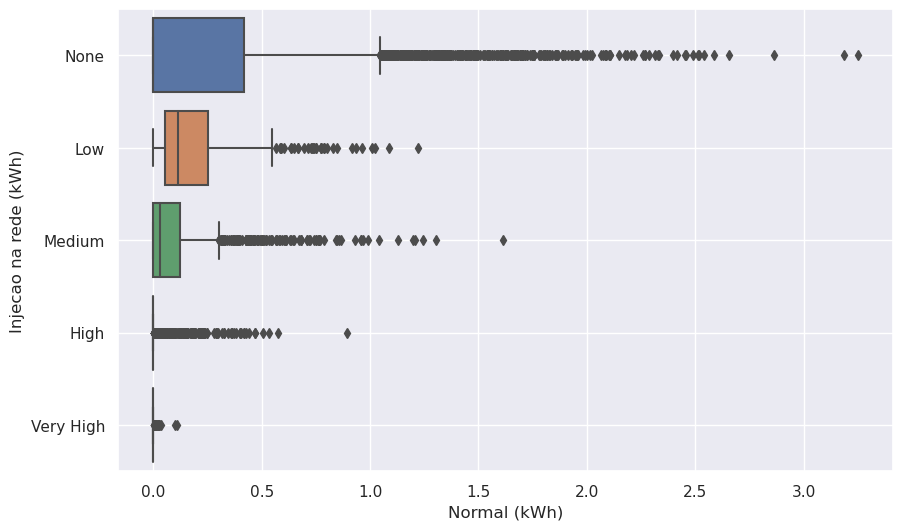

In [3233]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Normal (kWh)',y='Injecao na rede (kWh)')
plt.grid(True)
plt.show()

## Handling Categorical Data

### Handling Dates

In [3234]:
df['Data'] = pd.to_datetime(df['Data'], format = '%Y-%m-%d', errors='coerce')

df['year'] = df['Data'].dt.year
df['month'] = df['Data'].dt.month
df['day'] = df['Data'].dt.day

df = df.drop(['Data'], axis=1)

df.head()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Consumo Total (kWh),Taxa Autoconsumo,is_weekend,Previsao Injecao,year,month,day
0,0,0.0,0.0,0.0,None,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,0.0,87,overcast clouds,0.0,0.0,0,0.0,2021,9,29
1,1,0.0,0.0,0.0,None,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,0.0,91,overcast clouds,0.0,0.0,0,0.0,2021,9,29
2,2,0.0,0.0,0.0,None,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,0.0,93,overcast clouds,0.0,0.0,0,0.0,2021,9,29
3,3,0.0,0.0,0.0,None,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,0.0,95,overcast clouds,0.0,0.0,0,0.0,2021,9,29
4,4,0.0,0.0,0.0,None,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,0.0,93,overcast clouds,0.0,0.0,0,0.0,2021,9,29


In [3235]:
X_test['Data'] = pd.to_datetime(X_test['Data'], format = '%Y-%m-%d', errors='coerce')
X_test['year'] = X_test['Data'].dt.year
X_test['month'] = X_test['Data'].dt.month
X_test['day'] = X_test['Data'].dt.day

X_test = X_test.drop(['Data'], axis=1) 

X_test.head()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Consumo Total (kWh),Taxa Autoconsumo,is_weekend,Previsao Injecao,year,month,day
0,0,0.0,0.467,0.0,1672531200,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,moderate rain,0.467,0.0,1,-0.467,2023,1,1
1,1,0.0,0.577,0.0,1672534800,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,moderate rain,0.577,0.0,1,-0.577,2023,1,1
2,2,0.0,0.346,0.0,1672538400,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,moderate rain,0.346,0.0,1,-0.346,2023,1,1
3,3,0.0,0.270,0.0,1672542000,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,moderate rain,0.270,0.0,1,-0.270,2023,1,1
4,4,0.0,0.252,0.0,1672545600,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,moderate rain,0.252,0.0,1,-0.252,2023,1,1


# DATA VISUALIZATION

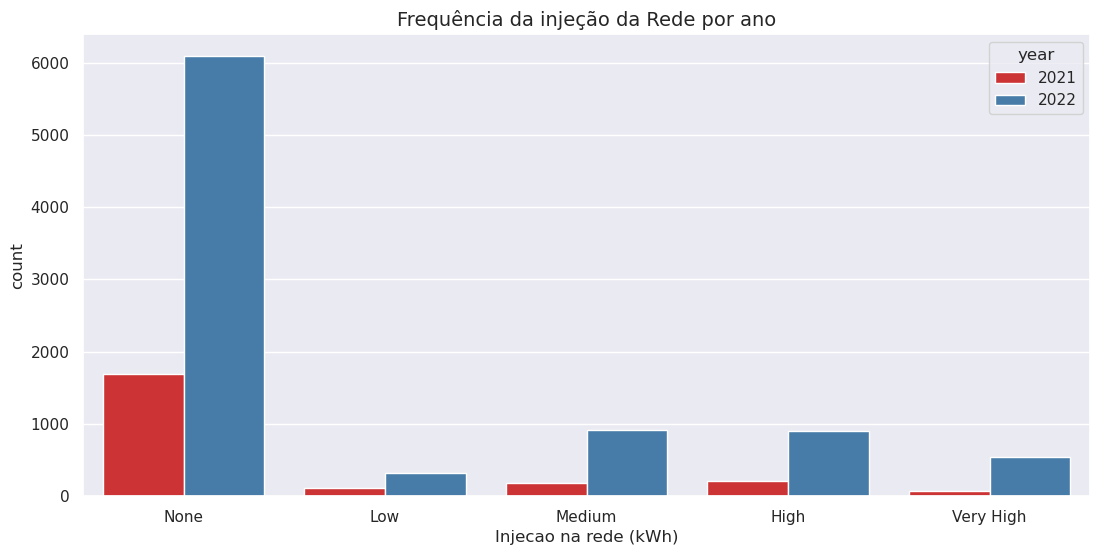

In [3236]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='Injecao na rede (kWh)', hue='year', palette='Set1')
plt.title('Frequência da injeção da Rede por ano', fontsize=14)
plt.show()

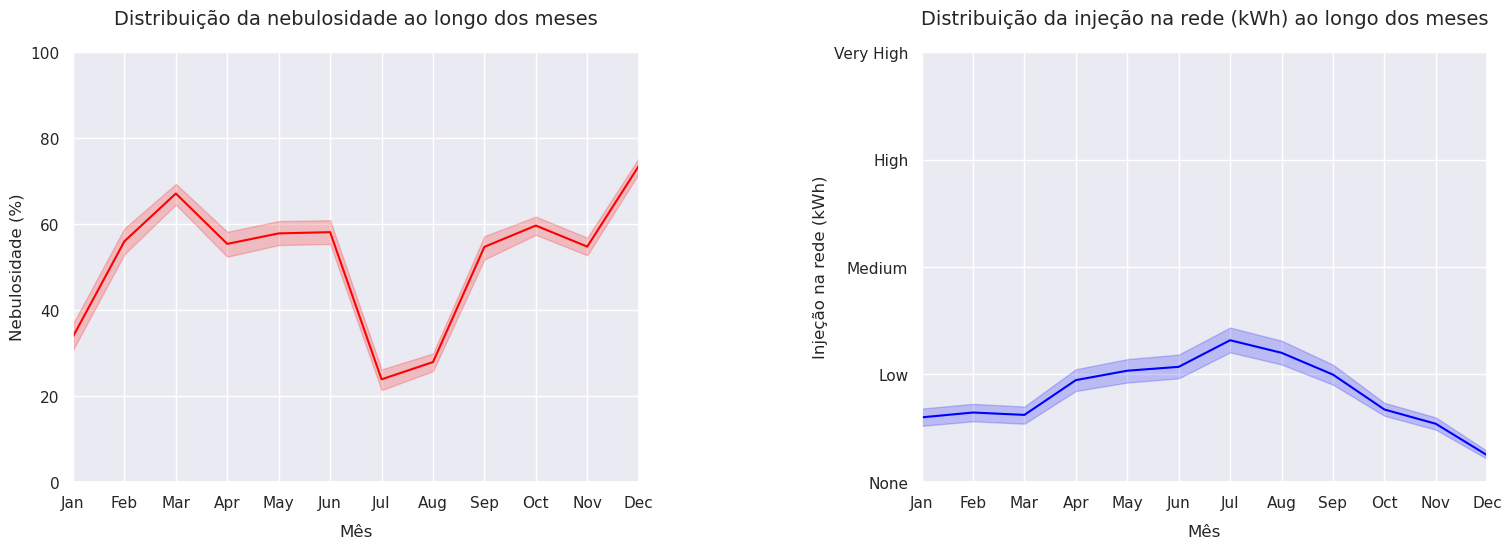

In [3237]:
janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.tight_layout()
janela.subplots_adjust(wspace=0.5)

sns.lineplot(data=df, x='month', y='clouds_all', color='red', ax=graficos[0])
graficos[0].set_xticks(np.arange(1, 13))
graficos[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
graficos[0].set_ylim(0, df['clouds_all'].max())
graficos[0].set_xlim(1,12)
graficos[0].set_title('Distribuição da nebulosidade ao longo dos meses', fontsize=14,pad=20)
graficos[0].set_xlabel('Mês', fontsize=12,labelpad=10)
graficos[0].set_ylabel('Nebulosidade (%)', fontsize=12)

sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='month', y='Injecao na rede (kWh)', color='blue', ax=graficos[1])#,ci=None) #ci=None remove o intervalo de confiança
graficos[1].set_xticks(np.arange(1, 13))
graficos[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
graficos[1].set_ylim(0, df['Injecao na rede (kWh)'].max())
graficos[1].set_xlim(1,12)
graficos[1].set_title('Distribuição da injeção na rede (kWh) ao longo dos meses', fontsize=14,pad=20)
graficos[1].set_xlabel('Mês', fontsize=12,labelpad=10)
graficos[1].set_ylabel('Injeção na rede (kWh)', fontsize=12)

plt.show()

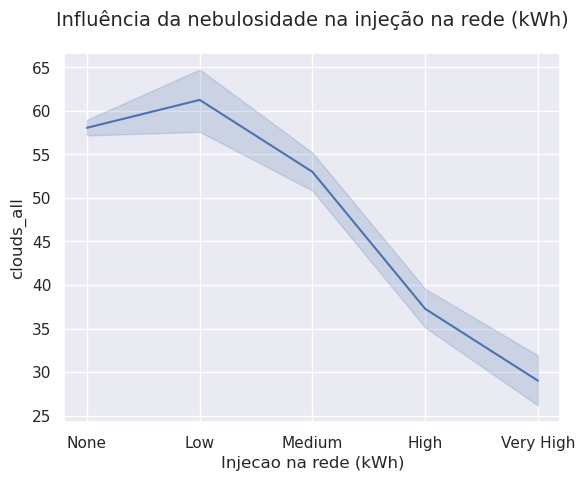

In [3238]:
sns.lineplot(data=df, x="Injecao na rede (kWh)", y="clouds_all")
plt.title('Influência da nebulosidade na injeção na rede (kWh)', y=1.05, fontsize=14)
plt.show()

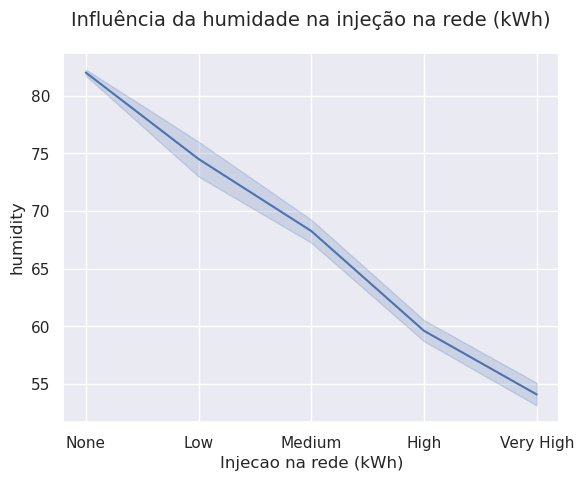

In [3239]:
sns.lineplot(data=df, x="Injecao na rede (kWh)", y="humidity")
plt.title('Influência da humidade na injeção na rede (kWh)', y=1.05, fontsize=14)
plt.show()

/home/santi/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


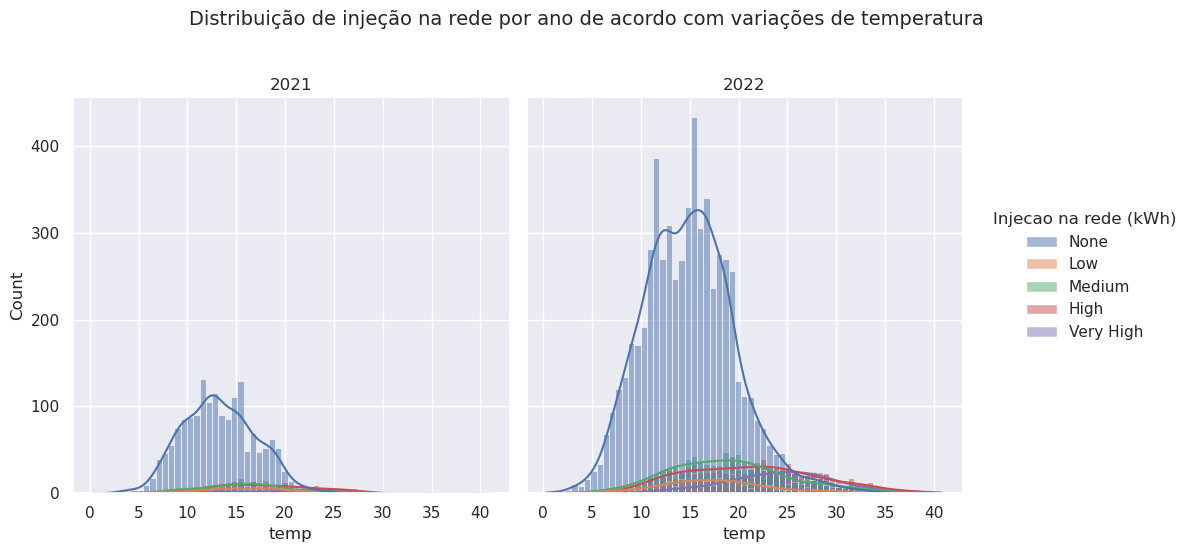

In [3240]:
g = sns.displot(data=df, x="temp", hue="Injecao na rede (kWh)", col="year", kde=True)
g.set_titles(row_template="")

custom_colnames = ["2021", "2022"]
for i, ax in enumerate(g.axes[0]):
    ax.set_title(custom_colnames[i], fontsize=12) 
plt.gcf().suptitle("Distribuição de injeção na rede por ano de acordo com variações de temperatura ", y=1.10, fontsize=14)
plt.show()

### Label Enconding

In [3241]:
lb_encodeTarget = LabelEncoder()
lb_encode = LabelEncoder()
df['Injecao na rede (kWh)'] = lb_encodeTarget.fit_transform(df['Injecao na rede (kWh)'])
df['weather_description'] = lb_encode.fit_transform(df['weather_description'])
df.head()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Consumo Total (kWh),Taxa Autoconsumo,is_weekend,Previsao Injecao,year,month,day
0,0,0.0,0.0,0.0,3,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,0.0,87,5,0.0,0.0,0,0.0,2021,9,29
1,1,0.0,0.0,0.0,3,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,0.0,91,5,0.0,0.0,0,0.0,2021,9,29
2,2,0.0,0.0,0.0,3,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,0.0,93,5,0.0,0.0,0,0.0,2021,9,29
3,3,0.0,0.0,0.0,3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,0.0,95,5,0.0,0.0,0,0.0,2021,9,29
4,4,0.0,0.0,0.0,3,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,0.0,93,5,0.0,0.0,0,0.0,2021,9,29


In [3242]:
X_test['weather_description'] = lb_encode.fit_transform(X_test['weather_description'])
X_test.head()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Consumo Total (kWh),Taxa Autoconsumo,is_weekend,Previsao Injecao,year,month,day
0,0,0.0,0.467,0.0,1672531200,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,4,0.467,0.0,1,-0.467,2023,1,1
1,1,0.0,0.577,0.0,1672534800,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,4,0.577,0.0,1,-0.577,2023,1,1
2,2,0.0,0.346,0.0,1672538400,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,4,0.346,0.0,1,-0.346,2023,1,1
3,3,0.0,0.270,0.0,1672542000,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,4,0.270,0.0,1,-0.270,2023,1,1
4,4,0.0,0.252,0.0,1672545600,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,4,0.252,0.0,1,-0.252,2023,1,1


# Exploratory Data Analysis

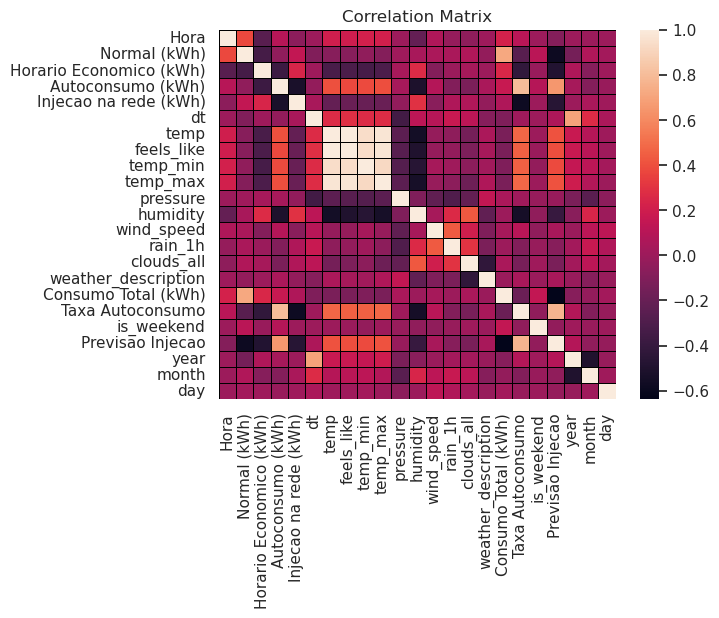

In [3243]:
#Correlation Matrix
correlation = df.corr(method='pearson')
sns.heatmap(correlation, linecolor='black', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Drop high correlated features

In [3244]:
X_test = X_test.drop(['feels_like','temp_min','temp_max', 'dt', 'Autoconsumo (kWh)', 'Consumo Total (kWh)'],axis=1)
df = df.drop(['feels_like','temp_min','temp_max', 'dt', 'Autoconsumo (kWh)', 'Consumo Total (kWh)'],axis=1)

## Feature Importance with Logistic Correlation
Using Logistic Regression to sort which variables have the highest predictive potential 

In [3245]:
stdsc = StandardScaler()

In [3246]:
X_train = df.drop(['Injecao na rede (kWh)'],axis=1)
y_train = df['Injecao na rede (kWh)']

In [3247]:
# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')

In [3248]:
# Dataset needs to be scalled, standardization is the chosen method
X_train_scaled = stdsc.fit_transform(X_train)
lr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [3249]:
feature_names = list(X_train)

feature_importance = abs(lr.coef_).sum(axis=0)

fti_dict = dict(zip(feature_names, feature_importance))

sorted_fti = sorted(fti_dict.items(), key=lambda x: x[1])

features = [[feature for feature, _ in sorted_fti],[importance for _, importance in sorted_fti]]

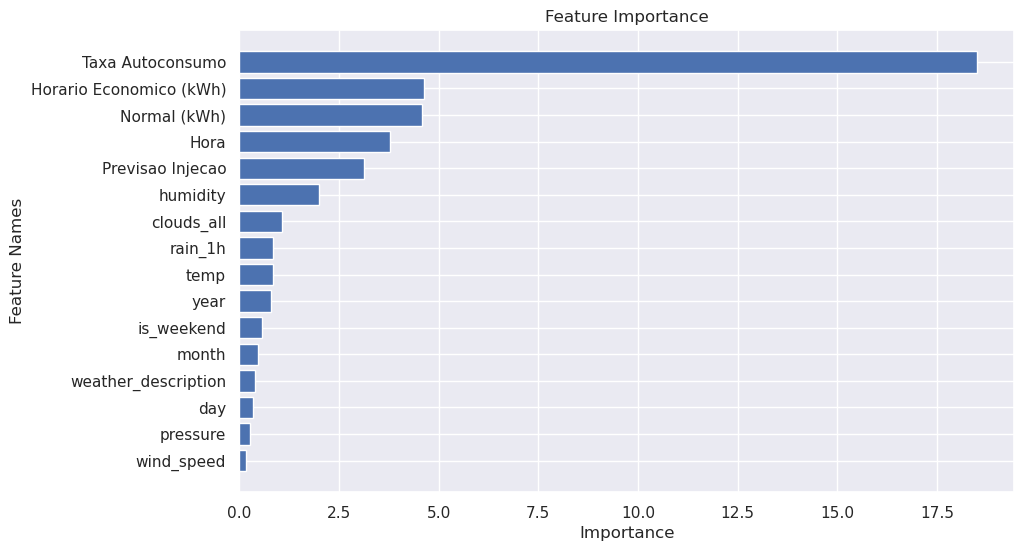

In [3250]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features[0], features[1])
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance')
plt.show()

In [3251]:
X_train.drop(['wind_speed', 'pressure', 'day', 'weather_description', 'month'], axis=1, inplace=True)
X_test.drop(['wind_speed', 'pressure', 'day', 'weather_description', 'month'], axis=1, inplace=True)

# Modeling Pipeline

### Building a pipeline for model testing

In [3252]:
models = {
    #'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    #'SVM':SVC(),
}

params = {
    #'DecisionTree':{'criterion': ['gini','entropy'], 'max_depth':range(1,10), 'min_samples_split':range(2,10), 'min_samples_leaf':range(1,5)}
    'RandomForest':{'n_estimators':[16, 32, 100],'criterion':['entropy'],'max_depth':range(1,10), 'min_samples_split':range(2,10)}
    #'SVM':{'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
}

In [3253]:
class ModelingPipeline:

    ## Initialing Pipeline with all models and respective hyperparameters
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.grids = {}
        self.predictions = {}  

    
    def fit(self, X_train, y_train, cv):
        model_counter = 1

        for key in self.models.keys():
            print("[%d/%d] Running Hyperparameter Tuning for %s." % (model_counter, len(self.models), key))
            model = self.models[key]
            params = self.params[key]
            grid = GridSearchCV(model, params, cv=cv, verbose=1, refit=True, return_train_score=True)
            grid.fit(X_train,y_train)
            self.grids[key] = grid
            model_counter += 1

    def predict(self, X_test_scaled):
        data = []
        for key in self.grids.keys():
            grid = self.grids[key]
            predictions = grid.predict(X_test_scaled)
            decoded_predictions = lb_encodeTarget.inverse_transform(predictions)
            for i in range(len(decoded_predictions)):
                row_data = {
                        'RowId': i+1,
                        'Result': decoded_predictions[i]
                }
                data.append(row_data)
            filepath = f'results/{key}.csv'
            pd.DataFrame(data).to_csv(filepath, index=False)
        
    def score(self):

        for key, grid in self.grids.items():

            data = []
            params = grid.cv_results_['params']
            mean_test_scores = grid.cv_results_['mean_test_score']
            std_test_scores = grid.cv_results_['std_test_score']

            for i in range(len(params)):
        
                row_data = {
                    'Mean_Score': mean_test_scores[i],
                    'Std_Score': std_test_scores[i],
                }

                for k, value in params[i].items():
                    row_data[k] = value

                for j in range(grid.cv):
                    cv_index = f'split{j}_test_score'
                    #if cv_index in grid.cv_results_:
                    row_data[cv_index] = grid.cv_results_[cv_index][i]

                data.append(row_data)

            #timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
            filepath = f'results/{key}.csv'
            pd.DataFrame(data).sort_values(by='Mean_Score', ascending=False).to_csv(filepath, index=False)
    
    def results_analysis(self):

        for file in os.listdir('results/'):
            r = pd.read_csv(f'results/{file}')

            print('==> Model: %s' % (file.split('.')[0]))
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', 1000)
            pd.set_option('display.colheader_justify', 'center')
            pd.set_option('display.precision', 5)
            print(r.head())


In [3254]:
pipeline = ModelingPipeline(models,params)
X_train_scaled = stdsc.fit_transform(X_train)
X_test_scaled = stdsc.fit_transform(X_test)

In [3255]:
pipeline.fit(X_train, y_train,cv=10)

[1/1] Running Hyperparameter Tuning for RandomForest.
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


In [3256]:
pipeline.score()
pipeline.results_analysis()

==> Model: RandomForest
   Mean_Score  Std_Score criterion  max_depth  min_samples_split  n_estimators  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score
0    0.86765    0.02546    entropy      9              3                32           0.82396            0.83394            0.85481            0.86933            0.88748            0.87477            0.89464            0.90917            0.85104            0.87738     
1    0.86738    0.02464    entropy      9              3               100           0.82214            0.84211            0.84936            0.86842            0.89383            0.87568            0.88738            0.90645            0.85104            0.87738     
2    0.86711    0.02585    entropy      9              7                32           0.82305            0.83575            0.84936            0.85935            0.89474 

In [3257]:
predict = pipeline.predict(X_test)